In [112]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [113]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df_0 = pd.read_csv('bengaluru_house_prices.csv')

In [116]:
df_0

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [117]:
cols_to_use = ['location', 'size', 'bath', 'total_sqft', 'price']

In [118]:
df_1 = df_0[cols_to_use]
df_1

,location,size,bath,total_sqft,price
0,Electronic City Phase II,2 BHK,2.0,1056,39.07
1,Chikka Tirupathi,4 Bedroom,5.0,2600,120.00
2,Uttarahalli,3 BHK,2.0,1440,62.00
3,Lingadheeranahalli,3 BHK,3.0,1521,95.00
4,Kothanur,2 BHK,2.0,1200,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,3453,231.00
13316,Richards Town,4 BHK,5.0,3600,400.00
13317,Raja Rajeshwari Nagar,2 BHK,2.0,1141,60.00
13318,Padmanabhanagar,4 BHK,4.0,4689,488.00


In [119]:
df_1.isna().sum()

location       1
size          16
bath          73
total_sqft     0
price          0
dtype: int64

In [120]:
print(f'mean: {df_1['bath'].mean()} | median: {df_1['bath'].median()} | mode: {df_1['bath'].mode()}')

mean: 2.6926096474673513 | median: 2.0 | mode: 0    2.0
Name: bath, dtype: float64


In [121]:
df_1[df_1['location'].isna() == True]

,location,size,bath,total_sqft,price
568,NaN,3 BHK,3.0,1600,86.0


In [122]:
df_1[df_1['size'].isna() == True]

,location,size,bath,total_sqft,price
579,Sarjapur Road,NaN,NaN,1200 - 2400,34.185
1775,IVC Road,NaN,NaN,2000 - 5634,124.000
2264,Banashankari,NaN,NaN,2400,460.000
2809,Sarjapur Road,NaN,NaN,1200 - 2400,28.785
2862,Devanahalli,NaN,NaN,1500 - 2400,46.800
5333,Devanahalli,NaN,NaN,2100 - 5405,177.115
6423,Whitefield,NaN,NaN,2324,26.730
6636,Jigani,NaN,NaN,1500,25.490
6719,Hoskote,NaN,NaN,800 - 2660,28.545
7680,Kasavanhalli,NaN,NaN,5000,400.000


In [123]:
df_2 = df_1.dropna(subset=['location', 'size'])

In [124]:
df_2.isna().sum()

location       0
size           0
bath          57
total_sqft     0
price          0
dtype: int64

In [125]:
df_3 = df_2.copy()
df_3['bath'] = df_2['bath'].fillna(df_2['bath'].median())

In [126]:
df_3.isna().sum()

location      0
size          0
bath          0
total_sqft    0
price         0
dtype: int64

In [127]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  object 
 2   bath        13303 non-null  float64
 3   total_sqft  13303 non-null  object 
 4   price       13303 non-null  float64
dtypes: float64(2), object(3)
memory usage: 623.6+ KB


In [128]:
df_3.head()

,location,size,bath,total_sqft,price
0,Electronic City Phase II,2 BHK,2.0,1056,39.07
1,Chikka Tirupathi,4 Bedroom,5.0,2600,120.00
2,Uttarahalli,3 BHK,2.0,1440,62.00
3,Lingadheeranahalli,3 BHK,3.0,1521,95.00
4,Kothanur,2 BHK,2.0,1200,51.00


In [129]:
df_4 = df_3.copy()

In [130]:
df_4['bedroom'] = df_4['size'].apply(lambda x: int(x.split(' ')[0]))

In [131]:
df_4

,location,size,bath,total_sqft,price,bedroom
0,Electronic City Phase II,2 BHK,2.0,1056,39.07,2
1,Chikka Tirupathi,4 Bedroom,5.0,2600,120.00,4
2,Uttarahalli,3 BHK,2.0,1440,62.00,3
3,Lingadheeranahalli,3 BHK,3.0,1521,95.00,3
4,Kothanur,2 BHK,2.0,1200,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,3453,231.00,5
13316,Richards Town,4 BHK,5.0,3600,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,2.0,1141,60.00,2
13318,Padmanabhanagar,4 BHK,4.0,4689,488.00,4


In [132]:
df_5 = df_4.drop('size', axis='columns')

In [133]:
df_5.isna().sum()

location      0
bath          0
total_sqft    0
price         0
bedroom       0
dtype: int64

In [134]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   bath        13303 non-null  float64
 2   total_sqft  13303 non-null  object 
 3   price       13303 non-null  float64
 4   bedroom     13303 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 623.6+ KB


In [135]:
df_5['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2110,), dtype=object)

In [136]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [137]:
df_5[~(df_5['total_sqft'].apply(is_float))]

,location,bath,total_sqft,price,bedroom
30,Yelahanka,4.0,2100 - 2850,186.000,4
56,Devanahalli,2.0,3010 - 3410,192.000,4
81,Hennur Road,2.0,2957 - 3450,224.500,4
122,Hebbal,4.0,3067 - 8156,477.000,4
137,8th Phase JP Nagar,2.0,1042 - 1105,54.005,2
...,...,...,...,...,...
12990,Talaghattapura,3.0,1804 - 2273,122.000,3
13059,Harlur,2.0,1200 - 1470,72.760,2
13240,Devanahalli,2.0,1020 - 1130,52.570,1
13265,Hoodi,2.0,1133 - 1384,59.135,2


In [138]:
def convert_range_to_num(x):
    tokens = x.split(('-'))
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [139]:
df_6 = df_5.copy()

In [140]:
df_6['total_sqft'] = df_6['total_sqft'].apply(convert_range_to_num)

In [141]:
df_6

,location,bath,total_sqft,price,bedroom
0,Electronic City Phase II,2.0,1056.0,39.07,2
1,Chikka Tirupathi,5.0,2600.0,120.00,4
2,Uttarahalli,2.0,1440.0,62.00,3
3,Lingadheeranahalli,3.0,1521.0,95.00,3
4,Kothanur,2.0,1200.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,4.0,3453.0,231.00,5
13316,Richards Town,5.0,3600.0,400.00,4
13317,Raja Rajeshwari Nagar,2.0,1141.0,60.00,2
13318,Padmanabhanagar,4.0,4689.0,488.00,4


In [142]:
df_5.loc[30, :]

location        Yelahanka
bath                  4.0
total_sqft    2100 - 2850
price               186.0
bedroom                 4
Name: 30, dtype: object

In [143]:
df_6.loc[30, :]

location      Yelahanka
bath                4.0
total_sqft       2475.0
price             186.0
bedroom               4
Name: 30, dtype: object

In [144]:
df_6.isna().sum()

location       0
bath           0
total_sqft    46
price          0
bedroom        0
dtype: int64

In [145]:
df_7 = df_6.dropna(subset='total_sqft')

In [146]:
df_7.isna().sum()

location      0
bath          0
total_sqft    0
price         0
bedroom       0
dtype: int64

In [147]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13257 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13257 non-null  object 
 1   bath        13257 non-null  float64
 2   total_sqft  13257 non-null  float64
 3   price       13257 non-null  float64
 4   bedroom     13257 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 621.4+ KB


In [148]:
df_7['location'].value_counts()

location
Whitefield                         537
Sarjapur  Road                     397
Electronic City                    302
Kanakpura Road                     271
Thanisandra                        233
                                  ... 
beml layout, basaveshwara nagar      1
Sadhguru Layout                      1
Chikbasavanapura                     1
Electronic City Phase 1,             1
Chuchangatta Colony                  1
Name: count, Length: 1298, dtype: int64

In [149]:
df_7['location'].value_counts().unique()

array([537, 397, 302, 271, 233, 212, 186, 177, 175, 171, 152, 151, 148,
       142, 132, 107, 100,  96,  91,  88,  85,  84,  81,  79,  74,  72,
        71,  70,  69,  66,  64,  63,  62,  60,  58,  57,  56,  55,  54,
        53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  40,
        39,  38,  37,  36,  35,  34,  33,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1])

In [150]:
df_group_by_location = df_7['location'].value_counts()

In [151]:
less_than_10 = df_group_by_location[df_group_by_location <= 10]

In [152]:
df_7['location'] = df_7['location'].apply(lambda x: 'Other' if x in less_than_10 else x)

C:\Users\rajoh\AppData\Local\Temp\ipykernel_4772\2906047062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7['location'] = df_7['location'].apply(lambda x: 'Other' if x in less_than_10 else x)


In [153]:
df_7['location'].value_counts()

location
Other                        2888
Whitefield                    537
Sarjapur  Road                397
Electronic City               302
Kanakpura Road                271
                             ... 
2nd Phase Judicial Layout      11
Marsur                         11
Bommenahalli                   11
Doddaballapur                  11
HAL 2nd Stage                  11
Name: count, Length: 241, dtype: int64

In [154]:
df_7['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [155]:
df_8 = df_7[(df_7['bath']) < (df_7['bedroom'] + 2)]

In [156]:
df_8 = df_8[~((df_8['total_sqft']/df_8['bedroom']) < 300)]
df_8

,location,bath,total_sqft,price,bedroom
0,Electronic City Phase II,2.0,1056.0,39.07,2
1,Chikka Tirupathi,5.0,2600.0,120.00,4
2,Uttarahalli,2.0,1440.0,62.00,3
3,Lingadheeranahalli,3.0,1521.0,95.00,3
4,Kothanur,2.0,1200.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,4.0,3453.0,231.00,5
13316,Other,5.0,3600.0,400.00,4
13317,Raja Rajeshwari Nagar,2.0,1141.0,60.00,2
13318,Padmanabhanagar,4.0,4689.0,488.00,4


In [157]:
df_8['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 16., 10., 12., 13.])

In [158]:
df_8

,location,bath,total_sqft,price,bedroom
0,Electronic City Phase II,2.0,1056.0,39.07,2
1,Chikka Tirupathi,5.0,2600.0,120.00,4
2,Uttarahalli,2.0,1440.0,62.00,3
3,Lingadheeranahalli,3.0,1521.0,95.00,3
4,Kothanur,2.0,1200.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,4.0,3453.0,231.00,5
13316,Other,5.0,3600.0,400.00,4
13317,Raja Rajeshwari Nagar,2.0,1141.0,60.00,2
13318,Padmanabhanagar,4.0,4689.0,488.00,4


In [159]:
df_8['price_per_sqft'] = (df_8['price'] * 100000)/df_8['total_sqft']

In [160]:
df_9 = df_8[~((df_8['total_sqft']/df_8['bedroom']) < 300)]
df_9

,location,bath,total_sqft,price,bedroom,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,39.07,2,3699.810606
1,Chikka Tirupathi,5.0,2600.0,120.00,4,4615.384615
2,Uttarahalli,2.0,1440.0,62.00,3,4305.555556
3,Lingadheeranahalli,3.0,1521.0,95.00,3,6245.890861
4,Kothanur,2.0,1200.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,4.0,3453.0,231.00,5,6689.834926
13316,Other,5.0,3600.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,60.00,2,5258.545136
13318,Padmanabhanagar,4.0,4689.0,488.00,4,10407.336319


### Removing Outliers

In [161]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [162]:
df_10 = remove_pps_outliers(df_9)

In [163]:
df_10

,location,bath,total_sqft,price,bedroom,price_per_sqft
0,Devarachikkanahalli,2.0,1250.0,44.00,3,3520.000000
1,Devarachikkanahalli,2.0,1250.0,40.00,2,3200.000000
2,Devarachikkanahalli,2.0,1200.0,83.00,2,6916.666667
3,Devarachikkanahalli,2.0,1170.0,40.00,2,3418.803419
4,Devarachikkanahalli,2.0,1425.0,65.00,3,4561.403509
...,...,...,...,...,...,...
10159,Yeshwanthpur,3.0,1676.0,92.13,3,5497.016706
10160,Yeshwanthpur,3.0,2503.0,138.00,3,5513.383939
10161,Yeshwanthpur,3.0,1855.0,135.00,3,7277.628032
10162,Yeshwanthpur,3.0,1876.0,160.00,3,8528.784648


In [164]:
df_10['bedroom'].value_counts()

bedroom
2     4756
3     3982
4      693
1      528
5      102
6       56
7       19
8       16
9        8
11       2
16       1
13       1
Name: count, dtype: int64

In [165]:
def scatter_plots(df, location):
    bedrooms_2 = df[(df_10['location'] == location) & (df['bedroom'] == 2)]
    bedrooms_3 = df[(df_10['location'] == location) & (df['bedroom'] == 3)]
    plt.scatter(bedrooms_2['total_sqft'], bedrooms_2['price'], label='2 Bedrooms')
    plt.scatter(bedrooms_3['total_sqft'], bedrooms_3['price'], label='3 Bedrooms', color='r', marker='*')
    plt.xlabel('Total Area (Square Feet)')
    plt.ylabel('Price (Lakh Indian Ru)')
    plt.title(location)
    plt.legend()
    plt.tight_layout()



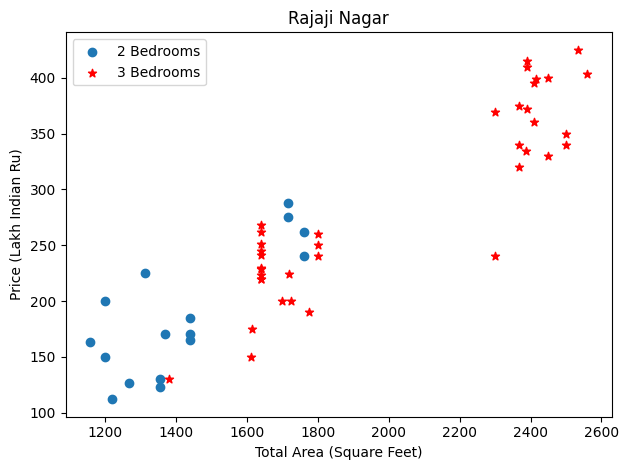

In [166]:
scatter_plots(df_10, 'Rajaji Nagar')

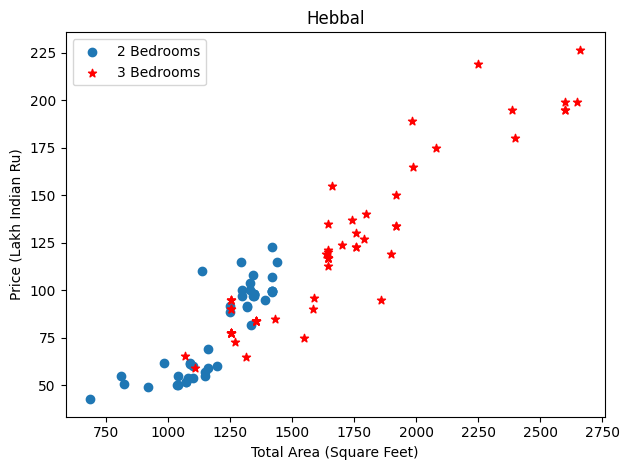

In [167]:
scatter_plots(df_10, 'Hebbal')

In [168]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedroom_df['price_per_sqft']),
                'std': np.std(bedroom_df['price_per_sqft']),
                'count': bedroom_df.shape[0]
            }

        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(bedroom - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bedroom_df[(bedroom_df['price_per_sqft']) < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [169]:
df_11 = remove_bedroom_outliers(df_10)

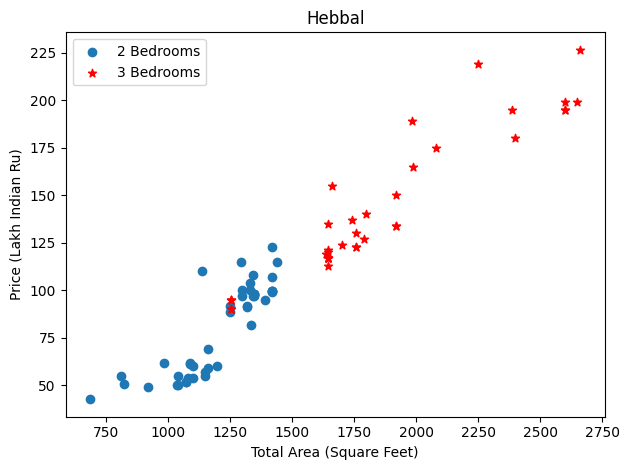

In [170]:
scatter_plots(df_11, 'Hebbal')

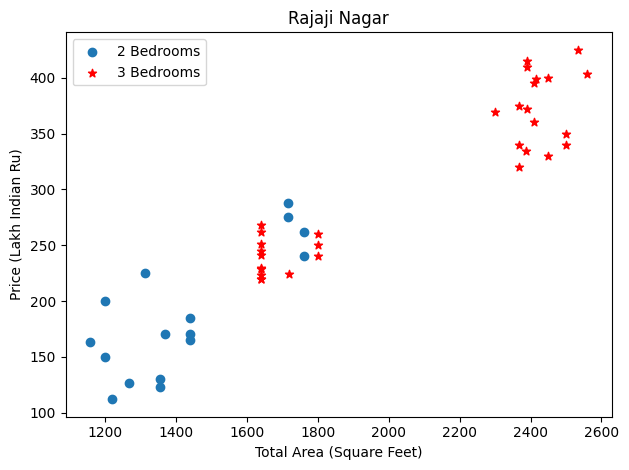

In [171]:
scatter_plots(df_11, 'Rajaji Nagar')

In [172]:
df_11

,location,bath,total_sqft,price,bedroom,price_per_sqft
1,Devarachikkanahalli,2.0,1250.0,40.0,2,3200.000000
2,Devarachikkanahalli,2.0,1200.0,83.0,2,6916.666667
3,Devarachikkanahalli,2.0,1170.0,40.0,2,3418.803419
4,Devarachikkanahalli,2.0,1425.0,65.0,3,4561.403509
5,Devarachikkanahalli,2.0,947.0,43.0,2,4540.654699
...,...,...,...,...,...,...
10153,Yeshwanthpur,2.0,1195.0,100.0,2,8368.200837
10154,Yeshwanthpur,3.0,1692.0,108.0,3,6382.978723
10156,Yeshwanthpur,5.0,2500.0,185.0,6,7400.000000
10161,Yeshwanthpur,3.0,1855.0,135.0,3,7277.628032


In [173]:
df_12 = df_11.drop(['price_per_sqft'], axis='columns')

In [174]:
df_12

,location,bath,total_sqft,price,bedroom
1,Devarachikkanahalli,2.0,1250.0,40.0,2
2,Devarachikkanahalli,2.0,1200.0,83.0,2
3,Devarachikkanahalli,2.0,1170.0,40.0,2
4,Devarachikkanahalli,2.0,1425.0,65.0,3
5,Devarachikkanahalli,2.0,947.0,43.0,2
...,...,...,...,...,...
10153,Yeshwanthpur,2.0,1195.0,100.0,2
10154,Yeshwanthpur,3.0,1692.0,108.0,3
10156,Yeshwanthpur,5.0,2500.0,185.0,6
10161,Yeshwanthpur,3.0,1855.0,135.0,3


In [175]:
dummies = pd.get_dummies(df_12['location']).astype(int)

In [176]:
y = df_12['price']

In [177]:
X = pd.concat([df_12.drop(['location', 'price'], axis='columns'), dummies.drop(['Other'], axis='columns')], axis='columns')

In [178]:
X

,bath,total_sqft,bedroom,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2.0,1250.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1200.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1170.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1425.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,947.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,2.0,1195.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10154,3.0,1692.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10156,5.0,2500.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10161,3.0,1855.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10153    100.0
10154    108.0
10156    185.0
10161    135.0
10162    160.0
Name: price, Length: 7274, dtype: float64

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [181]:
cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)

In [182]:
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85622569, 0.86108816, 0.83700367, 0.8676818 , 0.87470912])

In [183]:
def compare_models(X, y):
    algorithms = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso_reg': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic'],
                'fit_intercept': [True, False]
            }
        },
        'ridge_reg': {
            'model': Ridge(),
            'params': {
                'alpha': [1, 2],
                'fit_intercept': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
    for algorithm_name, config in algorithms.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algorithm_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [184]:
compare_models(X, y)

C:\Users\rajoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rajoh\AppData\Local\Packages\PythonSoftwareFoundati

,model,best_score,best_params
0,linear_regression,0.859912,{'fit_intercept': False}
1,lasso_reg,0.732819,"{'alpha': 1, 'fit_intercept': True, 'selection..."
2,ridge_reg,0.858447,"{'alpha': 1, 'fit_intercept': False}"
3,decision_tree,0.681665,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [185]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [186]:
model.score(X_test, y_test)

0.8503286612201442

In [187]:
def model_predict(location, total_sqft, bath, bedroom):
    location_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bedroom

    if location_index >= 0:
        x[location_index] = 1
    
    return float(model.predict([x])[0])

In [188]:
model_predict('1st Phase JP Nagar', 1000, 2, 2)

4612.314543301149

In [189]:
model_predict('1st Phase JP Nagar',1000, 3, 3)

4610.412332839521

In [190]:
model_predict('Indira Nagar',1000, 2, 2)

4696.336275926929

In [191]:
model_predict('Indira Nagar',1000, 1, 1)

4698.238486388556

In [192]:
model_predict('Electronic City Phase II', 1056, 2, 2)

4810.430236901755

In [193]:
df_1[df_1['price'] > 3000]

,location,size,bath,total_sqft,price
13067,Defence Colony,10 Bedroom,13.0,7150,3600.0
